In [25]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import *
from scipy.interpolate import *
from matplotlib.pyplot import *
%matplotlib inline
from sklearn.model_selection import train_test_split

In [27]:
# Mengimpor dataset
dataset = pd.read_csv('Absenteeism_at_work.csv')
dataset.head()

,ID,Alasan ketidakhadiran,Bulan Absen,Hari di Minggu Ini,Musim,Biaya Transportasi,Jarak Rumah ke Tempat Kerja,Waktu Pelayanan,Usia,Rata-rata Beban Kerja/hari,...,Jumlah Anak,Pemabuk,Perokok,Jumlah Hewan Piaraan,Berat,Tinggi,Indeks Masa Tubuh,Jumlah Absen dalam Jam,Label_Kategori,Kategori
0,11,26,7,3,1,289,36,13,33,239.554,...,2,1,0,1,90,172,30,4,4,Obesitas
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,0,0,98,178,31,0,4,Obesitas
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,0,89,170,31,2,4,Obesitas
3,7,7,7,5,1,279,5,14,39,239.554,...,2,1,1,0,68,168,24,4,3,Berlebih
4,11,23,7,5,1,289,36,13,33,239.554,...,2,1,0,1,90,172,30,2,4,Obesitas


In [28]:
#Pre-processing
#mengecek apakah ada data yang bernilai NUll & NAs(True)
dataset.isna().any()

ID                             False
Alasan ketidakhadiran          False
Bulan Absen                    False
Hari di Minggu Ini             False
Musim                          False
Biaya Transportasi             False
Jarak Rumah ke Tempat Kerja    False
Waktu Pelayanan                False
Usia                           False
Rata-rata Beban Kerja/hari     False
Target yang Tercapai           False
Ketidakdisiplinan              False
Pendidikan                     False
Jumlah Anak                    False
Pemabuk                        False
Perokok                        False
Jumlah Hewan Piaraan           False
Berat                          False
Tinggi                         False
Indeks Masa Tubuh              False
Jumlah Absen dalam Jam         False
Label_Kategori                 False
Kategori                       False
dtype: bool

In [29]:
dataset.nunique()

ID                             36
Alasan ketidakhadiran          28
Bulan Absen                    13
Hari di Minggu Ini              5
Musim                           4
Biaya Transportasi             24
Jarak Rumah ke Tempat Kerja    25
Waktu Pelayanan                18
Usia                           22
Rata-rata Beban Kerja/hari     38
Target yang Tercapai           13
Ketidakdisiplinan               2
Pendidikan                      4
Jumlah Anak                     5
Pemabuk                         2
Perokok                         2
Jumlah Hewan Piaraan            6
Berat                          26
Tinggi                         14
Indeks Masa Tubuh              17
Jumlah Absen dalam Jam         19
Label_Kategori                  3
Kategori                        3
dtype: int64

In [30]:
dataset.describe()

,ID,Alasan ketidakhadiran,Bulan Absen,Hari di Minggu Ini,Musim,Biaya Transportasi,Jarak Rumah ke Tempat Kerja,Waktu Pelayanan,Usia,Rata-rata Beban Kerja/hari,...,Pendidikan,Jumlah Anak,Pemabuk,Perokok,Jumlah Hewan Piaraan,Berat,Tinggi,Indeks Masa Tubuh,Jumlah Absen dalam Jam,Label_Kategori
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324,3.190541
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998,0.658178
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000,2.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000,3.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000,4.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000,4.000000


In [7]:
#menentukan variabel x dan y
X = dataset['Biaya Transportasi'].values
Y = dataset['Jarak Rumah ke Tempat Kerja'].values

In [8]:
# Menghitung secara manual untuk memperoleh b0 dan b1
# Menghitung nilai rata-rata X dan rata-rata Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Menghitung jumlah data
n = len(X)

# Penggunaan formula perhitungan mencari nilai b0 dan b1
numer = 0   #pembilang
denom = 0   #penyebut
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x)**2
b1 = numer / denom
b0 = mean_y -(b1 * mean_x)

# Menampilkan nilai coefficient
print(b1, b0)

0.05810046560931361 16.771720730600244


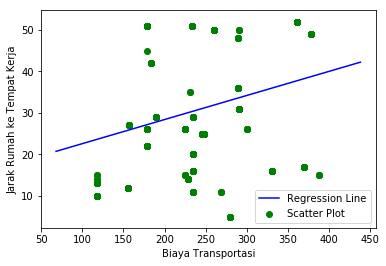

In [10]:
# Membuat plot nilai dan garis regresi

max_x = np.max(X) + 50
min_x = np.min(X) - 50

# Menghitung nilai garis grafik x dan y
x = np.linspace(min_x, max_x, 100)
y = b0 + b1 * x

#Garis regresi
plt.plot(x, y, color = 'blue', label = 'Regression Line')
#Scatter plot
plt.scatter(X, Y, c = 'green', label = 'Scatter Plot')

plt.xlabel('Biaya Transportasi')
plt.ylabel('Jarak Rumah ke Tempat Kerja')
plt.legend()
plt.show()

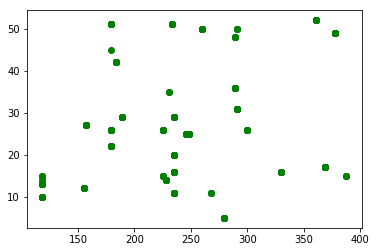

In [17]:
plot (X,Y,'go')

In [18]:
X = dataset.iloc[:, [5, 6]].values

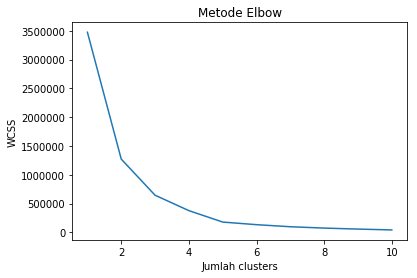

In [19]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

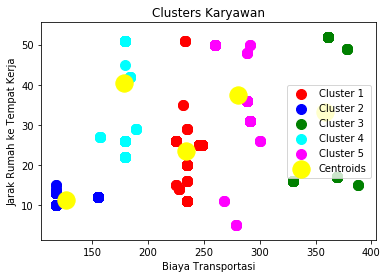

In [22]:
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters Karyawan')
plt.xlabel('Biaya Transportasi')
plt.ylabel('Jarak Rumah ke Tempat Kerja')
plt.legend()
plt.show()

In [31]:
#menentukan variabel x dan y
X = dataset['Indeks Masa Tubuh'].values
Y = dataset['Berat'].values

In [32]:
# Menghitung secara manual untuk memperoleh b0 dan b1
# Menghitung nilai rata-rata X dan rata-rata Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Menghitung jumlah data
n = len(X)

# Penggunaan formula perhitungan mencari nilai b0 dan b1
numer = 0   #pembilang
denom = 0   #penyebut
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x)**2
b1 = numer / denom
b0 = mean_y -(b1 * mean_x)

# Menampilkan nilai coefficient
print(b1, b0)

2.7180161501299547 6.526544838222392


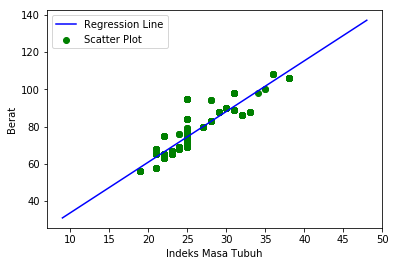

In [36]:
# Membuat plot nilai dan garis regresi

max_x = np.max(X) + 10
min_x = np.min(X) - 10

# Menghitung nilai garis grafik x dan y
x = np.linspace(min_x, max_x, 20)
y = b0 + b1 * x

#Garis regresi
plt.plot(x, y, color = 'blue', label = 'Regression Line')
#Scatter plot
plt.scatter(X, Y, c = 'green', label = 'Scatter Plot')

plt.xlabel('Indeks Masa Tubuh')
plt.ylabel('Berat')
plt.legend()
plt.show()

In [37]:
#menentukan variabel x dan y
X = dataset['Indeks Masa Tubuh'].values
Y = dataset['Tinggi'].values

In [48]:
# Menghitung secara manual untuk memperoleh b0 dan b1
# Menghitung nilai rata-rata X dan rata-rata Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Menghitung jumlah data
n = len(X)

# Penggunaan formula perhitungan mencari nilai b0 dan b1
numer = 0   #pembilang
denom = 0   #penyebut
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x)**2
b1 = numer / denom
b0 = mean_y -(b1 * mean_x)

# Menampilkan nilai coefficient
print(b1, b0)

-0.17046712188290894 176.66242088255476


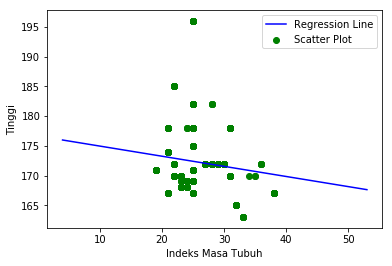

In [49]:
# Membuat plot nilai dan garis regresi

max_x = np.max(X) + 15
min_x = np.min(X) - 15

# Menghitung nilai garis grafik x dan y
x = np.linspace(min_x, max_x, 30)
y = b0 + b1 * x

#Garis regresi
plt.plot(x, y, color = 'blue', label = 'Regression Line')
#Scatter plot
plt.scatter(X, Y, c = 'green', label = 'Scatter Plot')

plt.xlabel('Indeks Masa Tubuh')
plt.ylabel('Tinggi')
plt.legend()
plt.show()

In [50]:
look_up_kategori = dict(zip(dataset.Label_Kategori.unique(), dataset.Kategori.unique()))
look_up_kategori

{4: 'Obesitas', 3: 'Berlebih', 2: 'Normal'}

In [51]:
feature_names = ['Berat', 'Tinggi']
X = dataset[feature_names]
y = dataset['Label_Kategori']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [53]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [54]:
knn.score(X_test, y_test)

0.9891891891891892

In [55]:
kategori_prediction = knn.predict([[86,120]])
look_up_kategori[kategori_prediction[0]]

'Obesitas'

In [56]:
kategori_prediction = knn.predict([[98,167]])
look_up_kategori[kategori_prediction[0]]

'Obesitas'

In [57]:
kategori_prediction = knn.predict([[75,160]])
look_up_kategori[kategori_prediction[0]]

'Berlebih'